<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import missingno as msno

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/application_train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/application_test.csv')

In [ ]:
print(f'train:{train.shape}\n test:{test.shape}')

train:(199882, 122)
 test:(107629, 121)


In [ ]:
print(f'train:{train.shape}\n test:{test.shape}')

train:(199882, 122)
 test:(107629, 121)


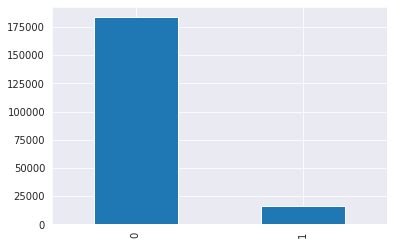

In [ ]:
train.TARGET.value_counts().plot.bar()

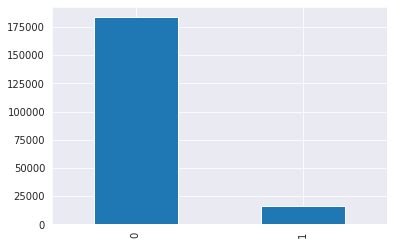

In [ ]:
train.TARGET.value_counts().plot.bar()

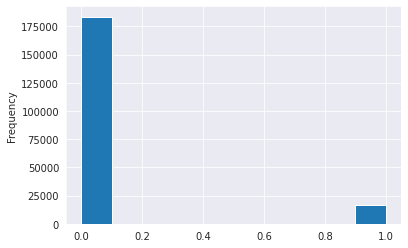

In [ ]:
train.TARGET.astype(int).plot.hist()

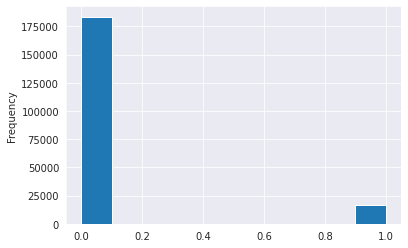

In [ ]:
train.TARGET.astype(int).plot.hist()

In [ ]:
train.TARGET.value_counts()

0    183651
1     16231
Name: TARGET, dtype: int64

In [ ]:
train.shape

(199882, 122)

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

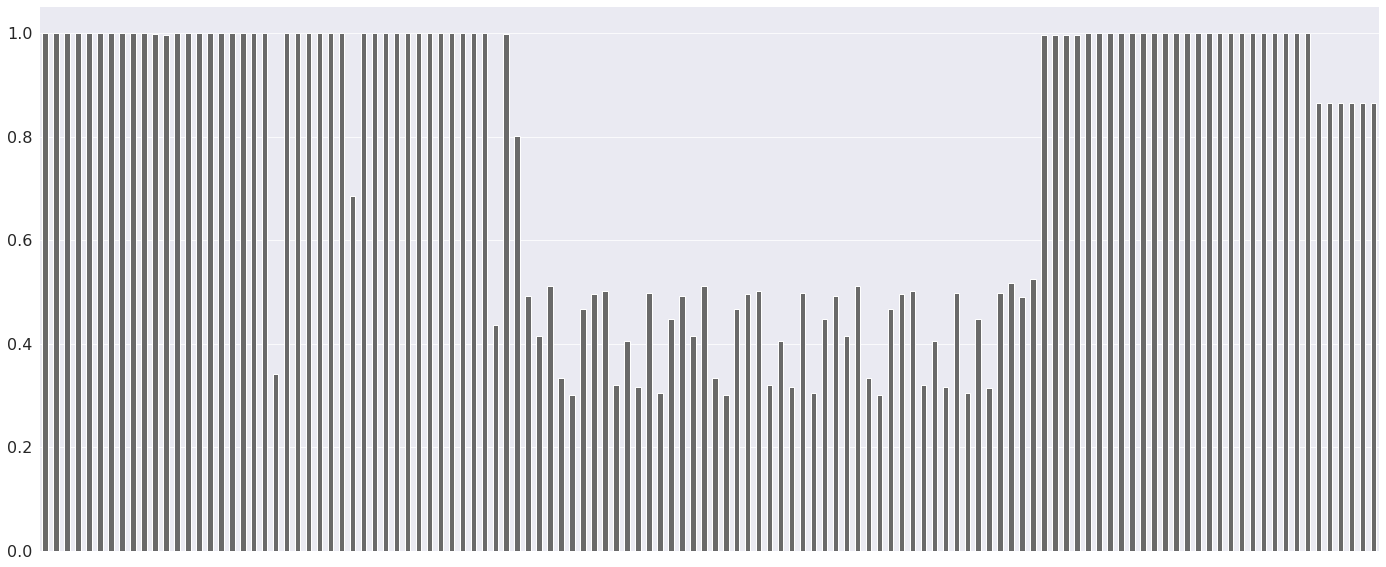

In [ ]:
msno.bar(train)

In [ ]:
def m_v_t(df):
  mis_val = df.isnull().sum()

  mis_val_percent = 100*df.isnull().sum()/len(df)

  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  mis_val_table_columns = mis_val_table.rename(columns = {0:'Missing val', 1:'% of Total Values'})

  mis_val_table_columns = mis_val_table_columns[mis_val_table_columns.iloc[:,1]!=0].sort_values(by='% of Total Values', ascending=False).round(1)
  
  return mis_val_table_columns

In [ ]:
def m_v_t(df):
  mis_val = df.isnull().sum()
  mis_val_percent = round(df.isnull().sum()/len(df)*100)
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_columns = mis_val_table.rename(columns={0:'Missing values', 1:'% of Total values'})
  mis_val_table_columns = mis_val_table_columns[mis_val_table_columns.iloc[:,1]!=0].sort_values(by='% of Total values', ascending=False)
  return mis_val_table_columns

In [ ]:
m_v_t(train).head(20)

,Missing values,% of Total values
COMMONAREA_MEDI,139817,70.0
COMMONAREA_AVG,139817,70.0
COMMONAREA_MODE,139817,70.0
NONLIVINGAPARTMENTS_AVG,138850,69.0
NONLIVINGAPARTMENTS_MEDI,138850,69.0
NONLIVINGAPARTMENTS_MODE,138850,69.0
LIVINGAPARTMENTS_MODE,136707,68.0
FONDKAPREMONT_MODE,136876,68.0
LIVINGAPARTMENTS_MEDI,136707,68.0
FLOORSMIN_MEDI,135783,68.0


In [ ]:
train.dtypes.value_counts()

float64    65
int64      40
object     17
dtype: int64

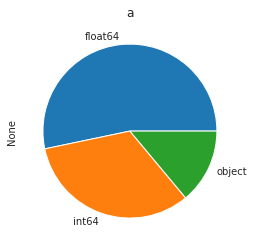

In [ ]:
train.dtypes.value_counts().plot.pie()

In [ ]:
train.select_dtypes('object').apply(pd.Series.nunique, axis=0)     ## nunique ==> unique 볼루의 개수를 나타냄

SK_ID_CURR                    199882
CODE_GENDER                        3
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
OCCUPATION_TYPE                   18
WEEKDAY_APPR_PROCESS_START         7
ORGANIZATION_TYPE                 58
FONDKAPREMONT_MODE                 4
HOUSETYPE_MODE                     3
WALLSMATERIAL_MODE                 7
EMERGENCYSTATE_MODE                2
dtype: int64

In [ ]:
train.select_dtypes('object').apply(pd.Series.nunique, axis=0)   ## select_dtypes('type') ==> 'type'의 columns를 반환,  .apply(pd.Series.nunique) ==> 반환된 columns의 개수 나타냄

SK_ID_CURR                    199882
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
OCCUPATION_TYPE                   18
WEEKDAY_APPR_PROCESS_START         7
ORGANIZATION_TYPE                 58
FONDKAPREMONT_MODE                 4
HOUSETYPE_MODE                     3
WALLSMATERIAL_MODE                 7
EMERGENCYSTATE_MODE                2
dtype: int64

In [ ]:
train.select_dtypes('object')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,aou6ud,Cash loans,M,N,Y,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,Managers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
1,xxbaad,Cash loans,F,N,Y,Family,Working,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,Self-employed,NaN,NaN,NaN,NaN
2,xdrbad,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Sales staff,WEDNESDAY,Hotel,reg oper account,block of flats,Panel,No
3,rbdd7d,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,THURSDAY,Industry: type 3,NaN,NaN,NaN,NaN
4,rexddr,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,SATURDAY,Self-employed,reg oper account,block of flats,Panel,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199877,oeuuar,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,SUNDAY,Business Entity Type 3,reg oper account,block of flats,Block,No
199878,6xodod,Cash loans,F,N,N,Unaccompanied,Working,Higher education,Married,House / apartment,Core staff,FRIDAY,Trade: type 7,NaN,NaN,NaN,NaN
199879,oee7d7,Revolving loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Accountants,THURSDAY,Business Entity Type 2,NaN,block of flats,Panel,No
199880,7ubuxd,Cash loans,F,Y,N,Unaccompanied,Working,Higher education,Single / not married,House / apartment,Managers,WEDNESDAY,Restaurant,reg oper spec account,block of flats,Panel,No


In [ ]:
train.EMERGENCYSTATE_MODE.

No     103520
Yes      1518
Name: EMERGENCYSTATE_MODE, dtype: int64

In [ ]:
le = LabelEncoder()   ## 카테고리가 2개 미만인 컬럼을 숫자 카테고리로 바꿈(나중 모델링 하려고)
le_count = 0

for col in train:
  if train[col].dtype == 'object':
    if len(list(train[col].unique())) <= 2:
      le.fit(train[col])
      train[col] = le.transform(train[col])
      test[col] = le.transform(test[col])

      le_count += 1
print('%d columns were label encoded' %le_count)

3 columns were label encoded


In [ ]:
le = LabelEncoder()
le_count = 0

for col in train:
  if train[col].dtype == 'object':
    if len(train[col].unique()) <= 2:
      le.fit(train[col])
      train[col] = le.transform(train[col])
      test[col] = le.transform(test[col])

      le_count += 1
      print(f'{col} founded')
print(f'{le_count} columns were label encoded')

NAME_CONTRACT_TYPE founded
FLAG_OWN_CAR founded
FLAG_OWN_REALTY founded
3 columns were label encoded


In [ ]:
train.FLAG_OWN_REALTY.dtypes

dtype('int64')

In [ ]:
train_labels = train['TARGET']

In [ ]:
train, test = train.align(test, join='inner', axis=1)
train['TARGET'] = train_labels
print('Training Feature shape:', train.shape)
print('Testing Featrue shape:', test.shape)

Training Feature shape: (199882, 122)
Testing Featrue shape: (107629, 121)


In [ ]:
(train['DAYS_BIRTH']/-365).describe()    ## DAYS_BIRTH 열의 숫자는 현재 대출 신청과 비교하여 기록되므로 음수입니다. 연도별 통계를 보려면 -1을 곱하고 일 수로 나누면 됩니다.

count    199882.000000
mean         43.909166
std          11.955512
min          21.021918
25%          33.961644
50%          43.117808
75%          53.890411
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [ ]:
(train['DAYS_BIRTH']/-365).describe()

count    199882.000000
mean         43.909166
std          11.955512
min          21.021918
25%          33.961644
50%          43.117808
75%          53.890411
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [ ]:
train['DAYS_EMPLOYED'].describe()

count    199882.000000
mean      63590.955214
std      141083.570901
min      -17912.000000
25%       -2761.000000
50%       -1215.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'DAYs Employment')

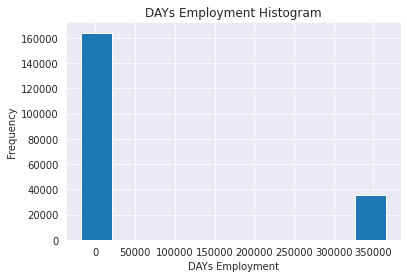

In [ ]:
train['DAYS_EMPLOYED'].plot.hist(title='DAYs Employment Histogram') ## hist는 분포를 나타낸다
plt.xlabel('DAYs Employment')

Text(0.5, 0, 'days Employment')

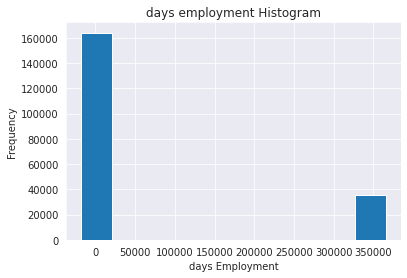

In [ ]:
train['DAYS_EMPLOYED'].plot.hist(title='days employment Histogram')
plt.xlabel('days Employment')

In [ ]:
anom = train[train['DAYS_EMPLOYED']==365243]
non_anom = train[train['DAYS_EMPLOYED']!=365243]
print('The non_anomalies default on %0.2f%% of loans' %(100*non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' %(100*anom['TARGET'].mean()))
print('There are %d anomalous days of employment' %len(anom))

The non_anomalies default on 8.70% of loans
The anomalies default on 5.48% of loans
There are 35869 anomalous days of employment


In [ ]:
anom = train[train['DAYS_EMPLOYED']==365243]
non_anom = train[train['DAYS_EMPLOYED']!=365243]
print('The non_anom defaut on %0.2f%% of loans'%(100*non_anom['TARGET'].mean()))
print('The anom default on %0.2f%% of loans' %(100*anom['TARGET'].mean()))
print('There are %d anom days of employment'%len(anom))

The non_anom defaut on 8.70% of loans
The anom default on 5.48% of loans
There are 35869 anom days of employment


Text(0.5, 0, 'Days Employment')

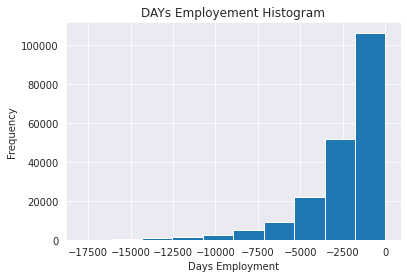

In [ ]:
train['DAYS_EMPLOYED_ANOM'] = train['DAYS_EMPLOYED'] == 365243

train['DAYS_EMPLOYED'].replace([365243,np.nan], inplace=True)

train['DAYS_EMPLOYED'].plot.hist(title='DAYs Employement Histogram')
plt.xlabel('Days Employment')

Text(0.5, 0, 'Days Employment')

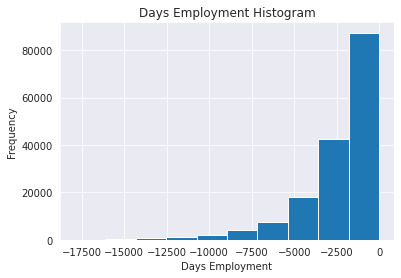

In [ ]:
train['DAYS_EMPLOYED_ANOM'] = train['DAYS_EMPLOYED'] == 365243
train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')

In [ ]:
train.DAYS_EMPLOYED.describe()

count    164013.000000
mean      -2379.164194
std        2329.563309
min      -17912.000000
25%       -3172.000000
50%       -1647.000000
75%        -765.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
train['DAYS_BIRTH'].corr(train['TARGET'])

-0.07817781719687468

In [ ]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
train['DAYS_BIRTH'].corr(train['TARGET'])

-0.07817781719687468

Text(0, 0.5, 'count')

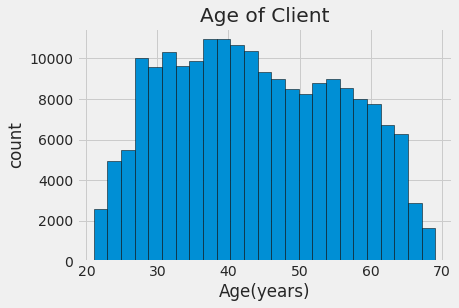

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(train['DAYS_BIRTH']/365, edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age(years)')
plt.ylabel('count')

Text(0, 0.5, 'count')

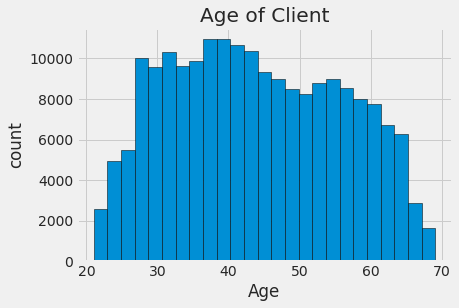

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(train.DAYS_BIRTH/365, edgecolor='k', bins=25)
plt.title('Age of Client')
plt.xlabel('Age')
plt.ylabel('count')

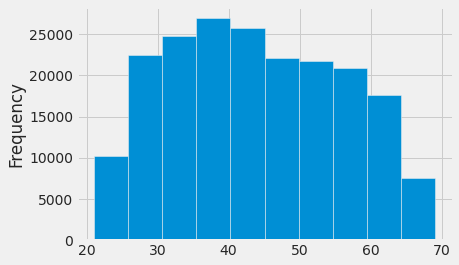

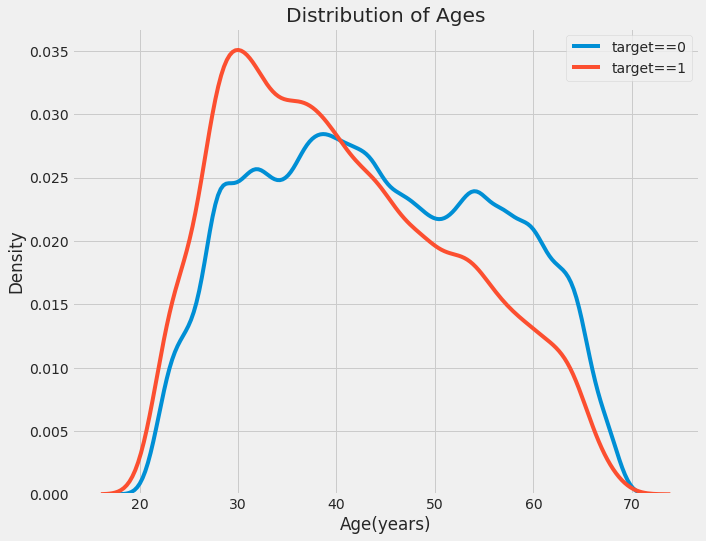

In [ ]:
train['AGE'] = train.DAYS_BIRTH/365
plt.figure(figsize=(10,8))

sns.kdeplot(train.loc[train['TARGET']==0, 'AGE'], label='target==0')
sns.kdeplot(train.loc[train['TARGET']==1, 'AGE'], label='target==1')
plt.xlabel('Age(years)')
plt.title('Distribution of Ages')
plt.legend()

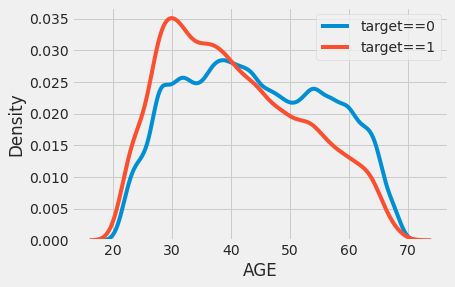

In [ ]:
train['AGE'] = train['DAYS_BIRTH']/365
plt.Figure(figsize=(12,8))
sns.kdeplot(x=train[train.TARGET==0].AGE, label='target==0')
sns.kdeplot(x=train[train.TARGET==1].AGE, label='target==1')
plt.legend()

In [ ]:
age_data = train[['TARGET', 'DAYS_BIRTH']]
age_data['AGE'] = train['AGE']

age_data['YEARS_BINNED'] = pd.cut(age_data['AGE'], bins=np.linspace(20, 70, num=11))   
age_data.head(10)   ## np.linespace(처음,끝,num) ==> 처음부터 끝까지 num의 개수만큼 생성

,TARGET,DAYS_BIRTH,AGE,YEARS_BINNED
0,0,18943,51.898630,"(50.0, 55.0]"
1,0,13894,38.065753,"(35.0, 40.0]"
2,0,19821,54.304110,"(50.0, 55.0]"
3,0,13034,35.709589,"(35.0, 40.0]"
4,1,18393,50.391781,"(50.0, 55.0]"
5,0,22685,62.150685,"(60.0, 65.0]"
6,0,11502,31.512329,"(30.0, 35.0]"
7,0,15085,41.328767,"(40.0, 45.0]"
8,0,18193,49.843836,"(45.0, 50.0]"
9,0,8528,23.364384,"(20.0, 25.0]"


In [ ]:
age_data = train[['TARGET', 'DAYS_BIRTH']]
age_data['AGE'] = train['AGE']

age_data['YEARS_BINNED'] = pd.cut(age_data['AGE'], bins=np.linspace(20,70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,AGE,YEARS_BINNED
0,0,18943,51.898630,"(50.0, 55.0]"
1,0,13894,38.065753,"(35.0, 40.0]"
2,0,19821,54.304110,"(50.0, 55.0]"
3,0,13034,35.709589,"(35.0, 40.0]"
4,1,18393,50.391781,"(50.0, 55.0]"
5,0,22685,62.150685,"(60.0, 65.0]"
6,0,11502,31.512329,"(30.0, 35.0]"
7,0,15085,41.328767,"(40.0, 45.0]"
8,0,18193,49.843836,"(45.0, 50.0]"
9,0,8528,23.364384,"(20.0, 25.0]"


In [ ]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,AGE
YEARS_BINNED,,,
"(20.0, 25.0]",0.121615,8534.346748,23.381772
"(25.0, 30.0]",0.112332,10151.782414,27.813103
"(30.0, 35.0]",0.103796,11854.830758,32.478988
"(35.0, 40.0]",0.089423,13707.276730,37.554183
"(40.0, 45.0]",0.079018,15497.813062,42.459762
"(45.0, 50.0]",0.074986,17324.120538,47.463344
"(50.0, 55.0]",0.067465,19195.404131,52.590148
"(55.0, 60.0]",0.055481,20983.194694,57.488205
"(60.0, 65.0]",0.052918,22786.018779,62.427449


In [ ]:
age_group = age_data.groupby('YEARS_BINNED').mean()
age_group

,TARGET,DAYS_BIRTH,AGE
YEARS_BINNED,,,
"(21.020999999999997, 27.816]",0.115829,9207.248048,25.225337
"(27.816, 31.364]",0.114023,10796.884656,29.580506
"(31.364, 34.879]",0.100336,12074.386703,33.080512
"(34.879, 38.214]",0.092015,13356.859997,36.594137
"(38.214, 41.43]",0.081775,14529.853938,39.807819
"(41.43, 44.838]",0.079082,15737.066645,43.115251
"(44.838, 48.74]",0.074873,17074.673640,46.779928
"(48.74, 52.945]",0.072223,18562.323131,50.855680
"(52.945, 56.874]",0.061138,20026.905569,54.868234


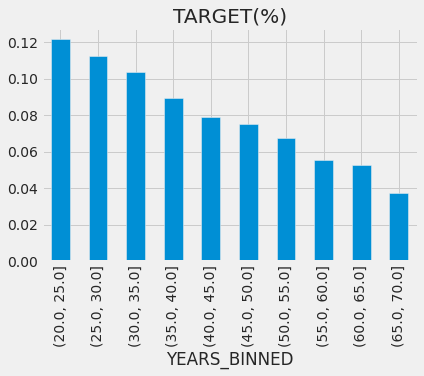

In [ ]:
age_groups.TARGET.plot.bar(title='TARGET(%)') ### 어쨌든 나이가 어릴수록 연채된다.

Text(0.5, 1.0, 'Failure to Repay by Age Group')

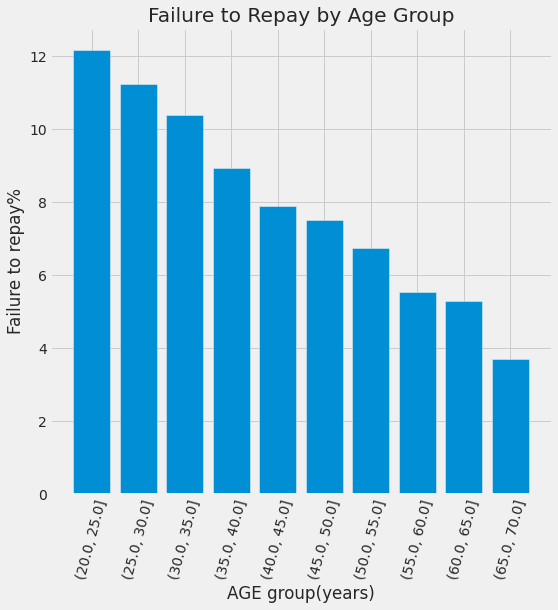

In [ ]:
plt.figure(figsize=(8,8))
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
plt.xticks(rotation=75)
plt.xlabel('AGE group(years)')
plt.ylabel('Failure to repay%')
plt.title('Failure to Repay by Age Group')

In [ ]:
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155788,-0.158738,-0.177750,-0.078178
EXT_SOURCE_1,-0.155788,1.000000,0.215830,0.188458,0.601123
EXT_SOURCE_2,-0.158738,0.215830,1.000000,0.108583,0.090304
EXT_SOURCE_3,-0.177750,0.188458,0.108583,1.000000,0.206977
DAYS_BIRTH,-0.078178,0.601123,0.090304,0.206977,1.000000


In [ ]:
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155788,-0.158738,-0.177750,-0.078178
EXT_SOURCE_1,-0.155788,1.000000,0.215830,0.188458,0.601123
EXT_SOURCE_2,-0.158738,0.215830,1.000000,0.108583,0.090304
EXT_SOURCE_3,-0.177750,0.188458,0.108583,1.000000,0.206977
DAYS_BIRTH,-0.078178,0.601123,0.090304,0.206977,1.000000


Text(0.5, 1.0, 'Corr Heatmap')

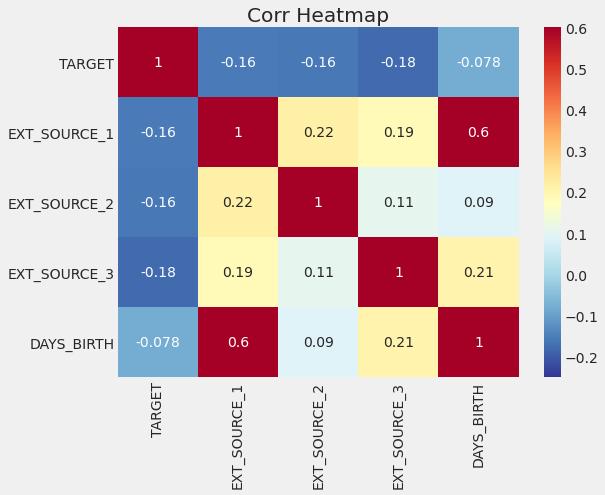

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=.6)
plt.title('Corr Heatmap')

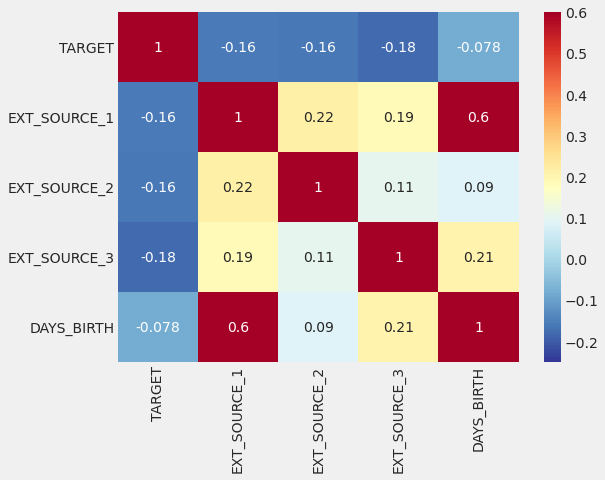

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(ext_data.corr(), cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=.6)

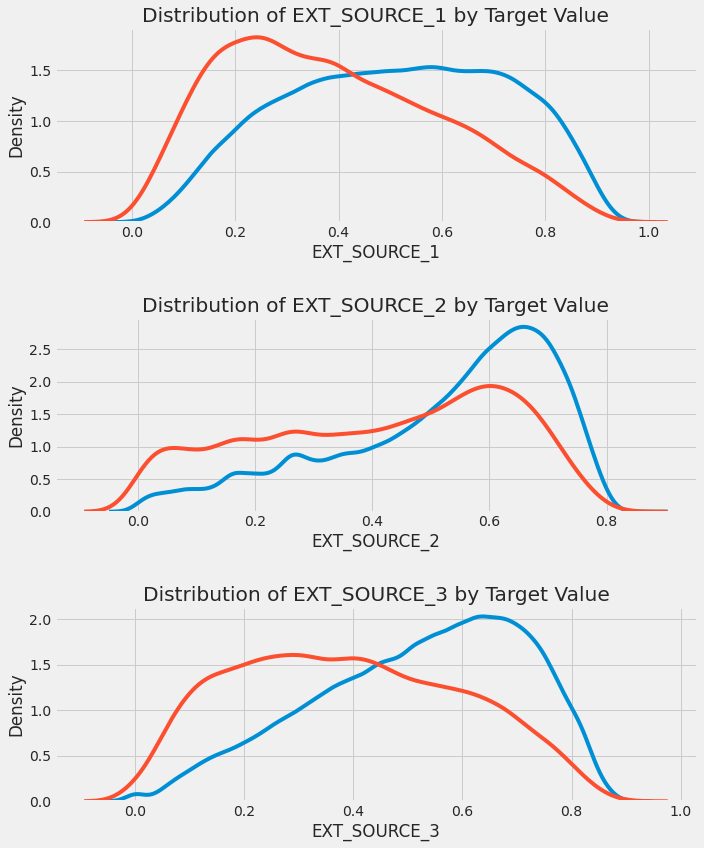

In [ ]:
plt.figure(figsize=(10,12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
  plt.subplot(3, 1, i+1)

  sns.kdeplot(train.loc[train['TARGET']==0, source], label='target==0')
  sns.kdeplot(train.loc[train['TARGET']==1, source], label='target==1')

  plt.title('Distribution of %s by Target Value' %source)
  plt.xlabel('%s' %source)
  plt.ylabel('Density')

plt.tight_layout(h_pad = 2.5)

Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

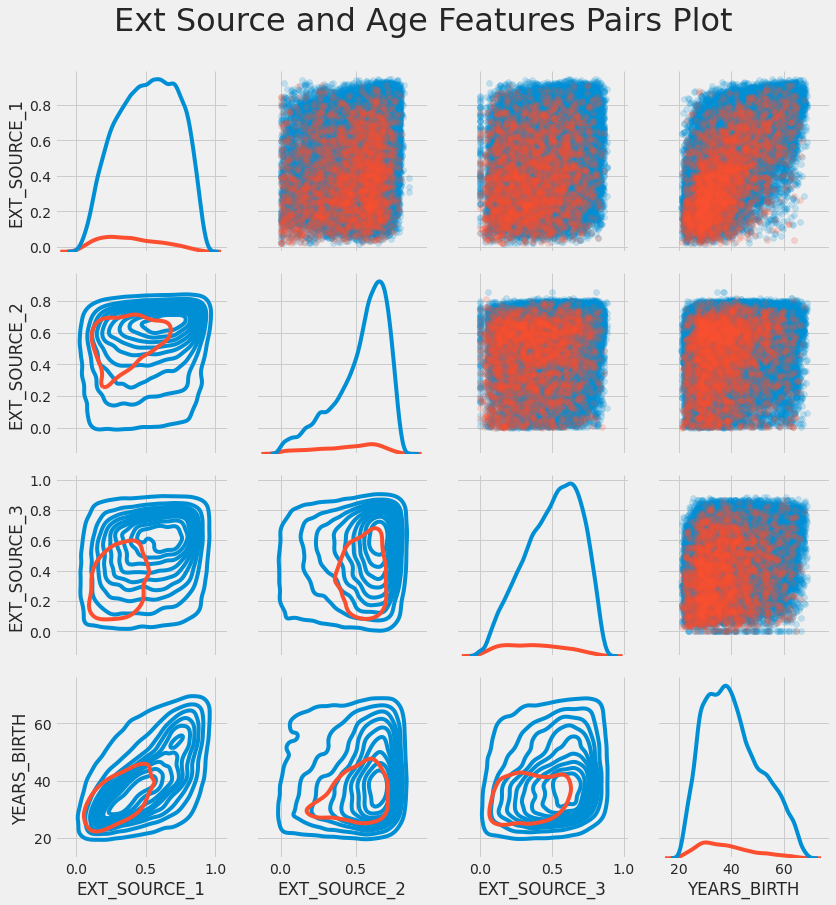

In [ ]:
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

plot_data['YEARS_BIRTH'] = age_data['AGE']

plot_data = plot_data.dropna().loc[:100000,:]

def corr_func(x, y, **kwargs):
  r = np.corrcoef(x,y)[0][1]
  ax = plt.gca()
  ax.annotate('r={:.2f}'.format(r), xy=(0.2, 0.8), xycoords=ax.transAxes, size=20)

grid = sns.PairGrid(data=plot_data, size=3, diag_sharey=False, hue = 'TARGET', vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

grid.map_upper(plt.scatter, alpha = 0.2)

grid.map_diag(sns.kdeplot)

grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)
plt.suptitle('Ext Source and Age Features Pairs Plot', size=32, y= 1.05)

In [ ]:
### 내일 마저 필사하기

In [ ]:
train['TARGET'] = train_labels

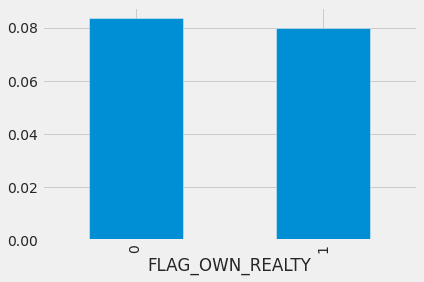

In [ ]:
train.groupby('FLAG_OWN_REALTY')['TARGET'].mean().plot.bar()

NAME_FAMILY_STATUS    TARGET
Civil marriage        0          17488
                      1           1930
Married               0         118123
                      1           9723
Separated             0          11757
                      1           1070
Single / not married  0          26593
                      1           2916
Unknown               0              1
Widow                 0           9689
                      1            592
Name: TARGET, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

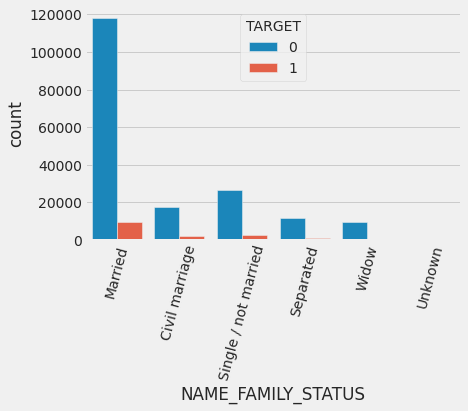

In [ ]:
print(train.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts())
sns.countplot(train.NAME_FAMILY_STATUS, hue='TARGET', data=train)
plt.xticks(rotation=75)

In [ ]:
train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,DAYS_EMPLOYED_ANOM,AGE
0,aou6ud,0,M,0,1,0,360000.0,1125000.0,33025.5,1125000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.022800,18943,-7369.0,-2353.0,-2479,NaN,1,1,0,1,0,0,Managers,2.0,2,2,WEDNESDAY,11,0,0,0,0,1,1,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,False,51.898630
1,xxbaad,0,F,0,1,0,112500.0,251280.0,13630.5,180000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.022625,13894,-1393.0,-5698.0,-5698,NaN,1,1,0,1,0,0,Sales staff,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1645.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0,0,False,38.065753
2,xdrbad,0,F,0,1,0,225000.0,544491.0,15916.5,454500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.035792,19821,-2075.0,-2121.0,-3379,NaN,1,1,1,1,0,0,Sales staff,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Hotel,...,0.0100,reg oper account,block of flats,0.0563,Panel,No,0.0,0.0,0.0,0.0,-1062.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0,0,False,54.304110
3,rbdd7d,0,F,0,0,2,211500.0,900000.0,26316.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006207,13034,-2205.0,-1193.0,-4141,NaN,1,1,1,1,0,0,Laborers,4.0,2,2,THURSDAY,17,0,0,0,0,0,0,Industry: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-484.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,35.709589
4,rexddr,0,F,0,1,0,90000.0,113760.0,8406.0,90000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,18393,-1694.0,-8279.0,-1890,NaN,1,1,1,1,0,0,Sales staff,2.0,3,3,SATURDAY,12,0,0,0,0,0,0,Self-employed,...,0.0357,reg oper account,block of flats,0.4617,Panel,No,3.0,0.0,3.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,1,False,50.391781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199877,oeuuar,0,F,0,0,1,126000.0,770292.0,34938.0,688500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.072508,11666,-2803.0,-5569.0,-2397,NaN,1,1,0,1,0,0,Laborers,3.0,1,1,SUNDAY,13,0,0,0,0,0,0,Business Entity Type 3,...,0.0284,r